In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [57]:
dataset = pd.read_csv('/content/insurance.csv')

In [58]:
# getting the first 5 rows of the dataset
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
# the size of data
dataset.shape

(1338, 7)

In [60]:
# checking for null values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
# what all are the input of the sex column
print(dataset['sex'].unique())
print(dataset['sex'].value_counts())

['female' 'male']
male      676
female    662
Name: sex, dtype: int64


In [62]:
# getting the discription of the data 
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [63]:
# what all are the input of the smoker column
print(dataset['smoker'].unique())
print(dataset['smoker'].value_counts())

['yes' 'no']
no     1064
yes     274
Name: smoker, dtype: int64


In [64]:
# what all are the input of the region column
print(dataset['region'].unique())
print(dataset['region'].value_counts())

['southwest' 'southeast' 'northwest' 'northeast']
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<ipython-input-65-ac35acb2ed86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()
<ipython-input-65-ac35acb2ed86>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)


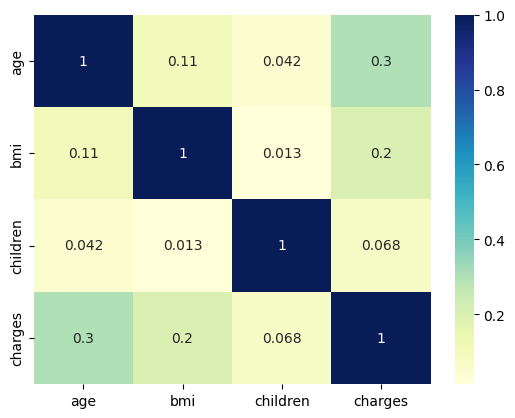

In [65]:
# before applying OneHotEncoding on the smokers, gender and region
dataset.corr()
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [66]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['charges']), dataset['charges'], test_size = 0.2)

In [67]:
# applying OneHotEncoding using ColumnTranformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse=False, drop='first'), ['sex', 'smoker', 'region'])], remainder='passthrough')

In [68]:
X_train = columnTransformer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
X_train

array([[ 1.   ,  0.   ,  0.   , ..., 18.   , 33.33 ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 59.   , 32.1  ,  3.   ],
       [ 1.   ,  0.   ,  0.   , ..., 35.   , 38.6  ,  1.   ],
       ...,
       [ 1.   ,  0.   ,  0.   , ..., 34.   , 34.21 ,  0.   ],
       [ 1.   ,  0.   ,  0.   , ..., 47.   , 28.215,  4.   ],
       [ 1.   ,  1.   ,  0.   , ..., 54.   , 25.1  ,  3.   ]])

In [72]:
# transforming X_test
X_test = columnTransformer.transform(X_test)

In [73]:
X_test

array([[ 1.   ,  0.   ,  0.   , ..., 39.   , 32.34 ,  2.   ],
       [ 1.   ,  0.   ,  1.   , ..., 21.   , 28.975,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 60.   , 36.005,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ..., 39.   , 22.8  ,  3.   ],
       [ 1.   ,  0.   ,  1.   , ..., 21.   , 31.255,  0.   ],
       [ 1.   ,  1.   ,  0.   , ..., 45.   , 22.895,  0.   ]])

Model Training - XGBoost Regressor


In [75]:
# loading the model
model = XGBRegressor()

In [76]:
# training the model with X_train and y_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [79]:
# getting the accuracy score
X_test_prediction = model.predict(X_test)

In [83]:
# R squared error
score_1 = metrics.r2_score(y_test, X_test_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(y_test, X_test_prediction)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

R squared error:  0.8160406701566117
Mean absolute error:  3103.8888370235977


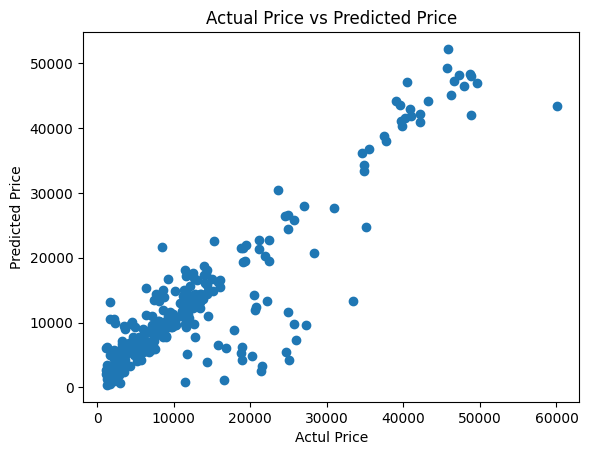

In [85]:
mp.scatter(y_test, X_test_prediction)
mp.xlabel("Actul Price")
mp.ylabel("Predicted Price")
mp.title("Actual Price vs Predicted Price")
mp.show()

-----------------------------------------------END---------------------------------